# Test WOFOST functionialities with focus on phenological model

In [1]:
import pcse



initialize a wofost object for winter wheat (crop = 1),

In [2]:
wofost_object = pcse.start_wofost(grid=31031, crop=1, year=2000, mode='wlp')


C:\Users\F80840370\Anaconda3\envs\py3_pcse\lib\site-packages\pcse\db\pcse\db_input.py:652: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  r = select([table_site],
C:\Users\F80840370\Anaconda3\envs\py3_pcse\lib\site-packages\pcse\db\pcse\db_input.py:127: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  r = s.execute()
C:\Users\F80840370\Anaconda3\envs\py3_pcse\lib\site-packages\pcse\db\pcse\db_input.py:183: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - 

run 

In [3]:
wofost_object.run()

In [4]:
wofost_object.run(days=10)

In [5]:
wofost_object.get_variable('LAI')

0.2870809817505803

run until maturity

In [6]:
wofost_object.run_till_terminate()

Next we retrieve the simulation results at each time-step (‘output’) of the simulation


In [6]:
output = wofost_object.get_output()



In [8]:
output

[{'day': datetime.date(2000, 1, 1),
  'DVS': 0.0,
  'LAI': 0.14468999999999999,
  'TAGP': 105.0,
  'TWSO': 0.0,
  'TWLV': 68.25,
  'TWST': 36.75,
  'TWRT': 105.0,
  'TRA': 0.005768242284916577,
  'RD': 10.0,
  'SM': 0.25,
  'WWLOW': 19.09},
 {'day': datetime.date(2000, 1, 2),
  'DVS': 0.008867383536197072,
  'LAI': 0.15418402101692283,
  'TAGP': 111.88971046220817,
  'TWSO': 0.0,
  'TWLV': 72.7283118004353,
  'TWST': 39.16139866177286,
  'TWRT': 111.88971046220817,
  'TRA': 0.0033115096601397517,
  'RD': 11.2,
  'SM': 0.253925411997922,
  'WWLOW': 18.337964614376727},
 {'day': datetime.date(2000, 1, 3),
  'DVS': 0.017157356051432475,
  'LAI': 0.16402496310910578,
  'TAGP': 119.03117787308113,
  'TWSO': 0.0,
  'TWLV': 77.37026561750274,
  'TWST': 41.660912255578396,
  'TWRT': 119.03117787308113,
  'TRA': 0.002588901447024583,
  'RD': 12.399999999999999,
  'SM': 0.25880410226057027,
  'WWLOW': 18.322170868031073},
 {'day': datetime.date(2000, 1, 4),
  'DVS': 0.024292506524744538,
  'LAI'

Now, just run the phenology module. For that, need to specify parameters

- crop parameters consist of parameter names and the corresponding parameter values that are needed to parameterize the components of the crop simulation model. They can be downloaded here 
https://raw.githubusercontent.com/ajwdewit/WOFOST_crop_parameters/master/. 

- Agromanagement
These parameters characterize the crop calendar and events (such as, e.g. irrigation). For the most basic set up, only crop calender is needed

- Weather data
daily weather data 




In [7]:
%matplotlib inline
import sys, os
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
import pandas as pd

data_dir = os.path.join(os.getcwd(), "data")
import pcse
print("This notebook was built with:")
print("python version: %s " % sys.version)
print("PCSE version: %s" %  pcse.__version__)

#CROPDATA
from pcse.fileinput import YAMLCropDataProvider
cropd=YAMLCropDataProvider(repository="https://raw.githubusercontent.com/ajwdewit/WOFOST_crop_parameters/master/")
cropd.print_crops_varieties()
#Region:  Central Germany, northern France
cropd.set_active_crop('wheat','Winter_wheat_105')
#set parameters from Ryan Conway
cropd['TSUM1'] = 974.     #! temperature sum from emergence to anthesis [cel d]
cropd['TSUM2'] = 1012.    #! temperature sum from anthesis to maturity [cel d]

#AGROMANAGEMENT
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'agro', 'wheat_calendar.txt')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
print(agromanagement)

#DAILY WEATHER OBS
from pcse.db import NASAPowerWeatherDataProvider
wdp = NASAPowerWeatherDataProvider(latitude=47.5, longitude=8)
#from pcse.fileinput import ExcelWeatherDataProvider
#weatherfile = os.path.join(data_dir, 'meteo', 'nl1.xls')
#wdp = ExcelWeatherDataProvider(weatherfile)
print(wdp)

print(cropd)

This notebook was built with:
python version: 3.8.13 (default, Mar 28 2022, 06:59:08) [MSC v.1916 64 bit (AMD64)] 
PCSE version: 5.5.3
crop 'barley', available varieties:
 - 'Spring_barley_301'
crop 'cassava', available varieties:
 - 'Cassava_VanHeemst_1988'
crop 'chickpea', available varieties:
 - 'Chickpea_VanHeemst_1988'
crop 'cotton', available varieties:
 - 'Cotton_VanHeemst_1988'
crop 'cowpea', available varieties:
 - 'Cowpea_VanHeemst_1988'
crop 'fababean', available varieties:
 - 'Faba_bean_801'
crop 'groundnut', available varieties:
 - 'Groundnut_VanHeemst_1988'
crop 'maize', available varieties:
 - 'Maize_VanHeemst_1988'
 - 'Grain_maize_201'
 - 'Grain_maize_202'
 - 'Grain_maize_203'
 - 'Grain_maize_204'
 - 'Grain_maize_205'
crop 'millet', available varieties:
 - 'Millet_VanHeemst_1988'
crop 'mungbean', available varieties:
 - 'Mungbean_VanHeemst_1988'
crop 'pigeonpea', available varieties:
 - 'Pigeonpea_VanHeemst_1988'
crop 'potato', available varieties:
 - 'Potato_701'
 - 'P

In [21]:
wdp.description
dir(wdp)
from datetime import date
day = date(2021,7,3)
wdc = wdp(day)
print(wdc)

Weather data for 2021-07-03 (DAY)
IRRAD:  20760000.00  J/m2/day
 TMIN:        13.27   Celsius
 TMAX:        23.48   Celsius
  VAP:        15.60       hPa
 RAIN:         0.20    cm/day
   E0:         0.44    cm/day
  ES0:         0.39    cm/day
  ET0:         0.38    cm/day
 WIND:         0.93     m/sec
 TEMP:        18.08   Celsius
Latitude  (LAT):    47.50 degr.
Longitude (LON):     8.00 degr.
Elevation (ELEV):  547.3 m.



AttributeError: 'NASAPowerWeatherDataProvider' object has no attribute 'TMIN'

In [22]:
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropd)



In [23]:
from pcse.models import Wofost72_Phenology
wofsim = Wofost72_Phenology(parameters, wdp, agromanagement)

In [24]:
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

,DVS,TSUM,TSUME,VERN
day,,,,
2021-07-25,1.939968,1610.719488,120.91,41.002857
2021-07-26,1.959453,1629.229488,120.91,41.002857
2021-07-27,1.979537,1648.309488,120.91,41.002857
2021-07-28,1.999295,1667.079488,120.91,41.002857
2021-07-29,2.000000,1684.859488,120.91,41.002857


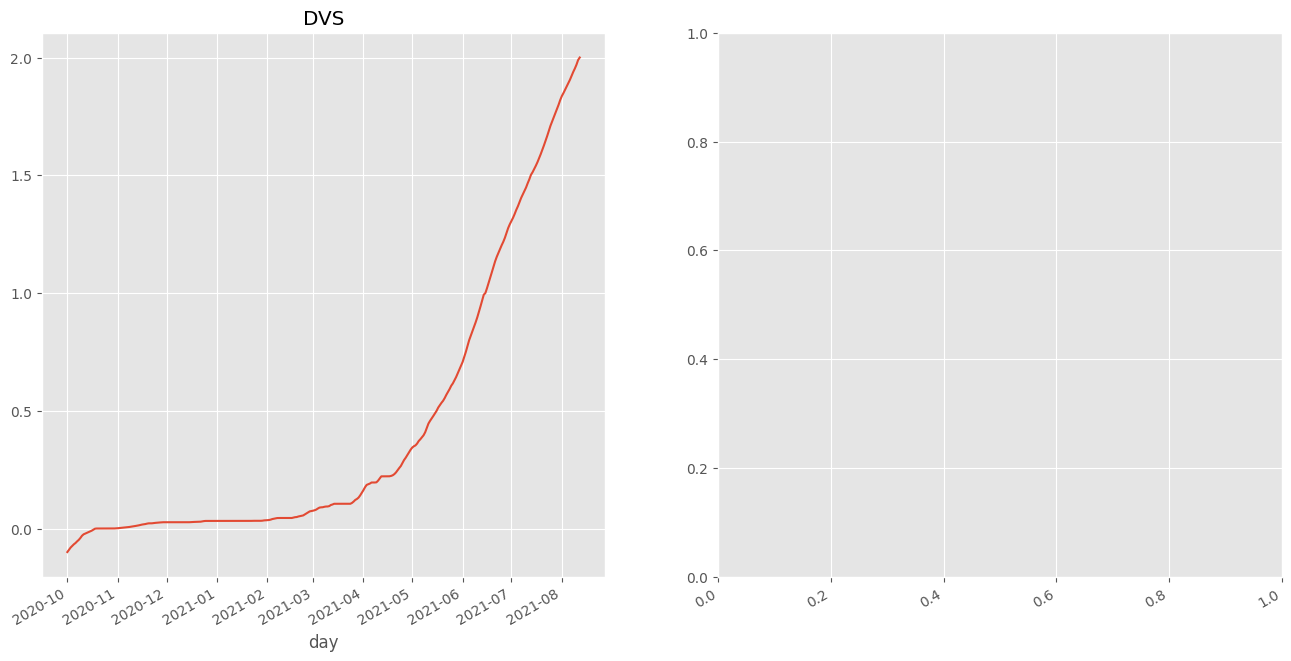

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
df_results['DVS'].plot(ax=axes[0], title="DVS")
#df['SM'].plot(ax=axes[1], title="Root zone soil moisture")
fig.autofmt_xdate()